In [1]:
import numpy as np
np.random.seed(0)

import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt


# PART 1: Training a convolutional neural network

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1.0/255)

In [16]:
imgdir = 'a5_images' # or wherever you put them...
img_size = 64
batch_size = 32


train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)



val_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [17]:
# Function that creates a convolutional neural network using Keras.
# The CNN is comprised of 3 blocks of a convolutional layer + max pooling, a flatten layer, and two dense layers.
# The convolutional layers uses a ReLU activation function and the output layer uses a sigmoid activation function.
def make_convnet():
    num_classes = 1
    img_size = 64

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(img_size, img_size, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))
    
    return model

In [18]:
model = make_convnet()


# Using binary crossentropy as loss function and the Adam optimizer for training
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
#Overview of the CNN
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 128)         204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [20]:
# Fitting the model using 20 epochs and the image generator generates 32 images at time.
model_fit = model.fit(train_generator,
          epochs=20,
          verbose=1,
          validation_data=val_generator);

Train for 50 steps, validate for 18 steps
Epoch 1/20
50/50 [==============================] - 22s 434ms/step - loss: 0.6771 - accuracy: 0.5744 - val_loss: 0.7727 - val_accuracy: 0.5312
Epoch 2/20
50/50 [==============================] - 18s 356ms/step - loss: 0.5971 - accuracy: 0.6906 - val_loss: 0.5540 - val_accuracy: 0.7292
Epoch 3/20
50/50 [==============================] - 20s 409ms/step - loss: 0.5579 - accuracy: 0.7294 - val_loss: 0.5692 - val_accuracy: 0.7135
Epoch 4/20
50/50 [==============================] - 22s 432ms/step - loss: 0.5084 - accuracy: 0.7481 - val_loss: 0.5741 - val_accuracy: 0.7205
Epoch 5/20
50/50 [==============================] - 20s 405ms/step - loss: 0.4666 - accuracy: 0.7700 - val_loss: 0.5231 - val_accuracy: 0.7517
Epoch 6/20
50/50 [==============================] - 19s 376ms/step - loss: 0.4231 - accuracy: 0.7987 - val_loss: 0.5283 - val_accuracy: 0.7396
Epoch 7/20
50/50 [==============================] - 31s 615ms/step - loss: 0.4000 - accuracy: 0.8087

In [21]:
# Validation loss = 1.119
# Validation accuracy = 0.758
model.evaluate(val_generator)

18/18 [==============================] - 3s 166ms/step - loss: 1.1193 - accuracy: 0.7587


[1.1193131845858362, 0.7586806]

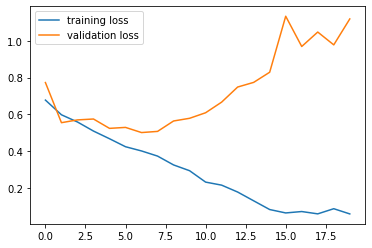

In [22]:
# Plotting training and validation loss
plt.plot(model_fit.history['loss']);
plt.plot(model_fit.history['val_loss']);
plt.legend(['training loss', 'validation loss']);

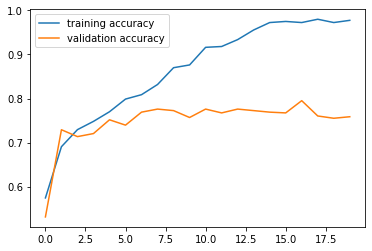

In [23]:
# Plotting training accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

Comments on the plots:

- When it comes to the loss we can see a pretty clear sign of overfitting: The validation loss decreases in the beginning but then steadily increases as the training loss just keeps decreasing.
- The same pattern can be seen with the accuracy, although not as extreme. The validation accuracy seems to flatten.

# PART 2: Data augmentation

In [24]:
# Creating a new Image data generator with the following parameters:
# schear_range = 0.2 (Shear angle in counter-clockwise direction in degrees)
# zoom_range = 0.2(Range for random zoom)
# horizontal_flip = True (This randomly flips inputs horizontally)
# vertical_flip = True (This randomly flips inputs vertically)

data_gen_new = ImageDataGenerator(rescale=1.0/255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True,vertical_flip = True)

train_generator_new = data_gen_new.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)



Found 1600 images belonging to 2 classes.


In [25]:
# Training model again using the new training image generator.
# The validtion images are generated from the same generator as in part 1.
model_new_fit = model.fit(train_generator_new,
         epochs = 20,
         verbose = 1,
         validation_data = val_generator)

Train for 50 steps, validate for 18 steps
Epoch 1/20
50/50 [==============================] - 42s 850ms/step - loss: 0.6694 - accuracy: 0.7262 - val_loss: 0.5052 - val_accuracy: 0.7812
Epoch 2/20
50/50 [==============================] - 37s 745ms/step - loss: 0.4695 - accuracy: 0.7900 - val_loss: 0.4659 - val_accuracy: 0.7865
Epoch 3/20
50/50 [==============================] - 32s 645ms/step - loss: 0.4648 - accuracy: 0.7806 - val_loss: 0.4845 - val_accuracy: 0.8125
Epoch 4/20
50/50 [==============================] - 39s 770ms/step - loss: 0.4361 - accuracy: 0.8094 - val_loss: 0.4785 - val_accuracy: 0.7830
Epoch 5/20
50/50 [==============================] - 31s 622ms/step - loss: 0.4123 - accuracy: 0.8163 - val_loss: 0.4578 - val_accuracy: 0.8142
Epoch 6/20
50/50 [==============================] - 33s 659ms/step - loss: 0.4292 - accuracy: 0.8094 - val_loss: 0.4494 - val_accuracy: 0.7865
Epoch 7/20
50/50 [==============================] - 25s 491ms/step - loss: 0.3923 - accuracy: 0.8219

2022-05-19 16:57:14.070389: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 45 of 50
2022-05-19 16:57:15.202184: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


50/50 [==============================] - 37s 745ms/step - loss: 0.2765 - accuracy: 0.8794 - val_loss: 0.5501 - val_accuracy: 0.7743
Epoch 18/20
50/50 [==============================] - 22s 445ms/step - loss: 0.2897 - accuracy: 0.8825 - val_loss: 0.4783 - val_accuracy: 0.7899
Epoch 19/20
50/50 [==============================] - 35s 703ms/step - loss: 0.2380 - accuracy: 0.9044 - val_loss: 0.4955 - val_accuracy: 0.7934
Epoch 20/20


2022-05-19 16:58:48.804857: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 41 of 50
2022-05-19 16:58:50.947072: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


50/50 [==============================] - 33s 664ms/step - loss: 0.2384 - accuracy: 0.8988 - val_loss: 0.4851 - val_accuracy: 0.7969


In [27]:
# Validation loss = 0.48
# Validation accuracy = 0.79
model.evaluate(val_generator)

18/18 [==============================] - 3s 175ms/step - loss: 0.4851 - accuracy: 0.7969


[0.48507945901817745, 0.796875]

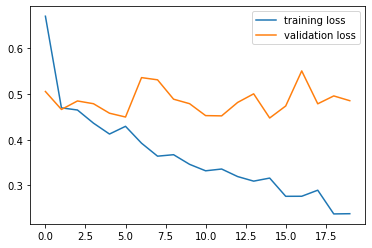

In [29]:
# Plotting training and validation loss
plt.plot(model_new_fit.history['loss']);
plt.plot(model_new_fit.history['val_loss']);
plt.legend(['training loss', 'validation loss']);

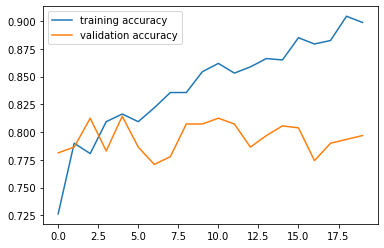

In [30]:
# Plotting training accuracy
plt.plot(model_new_fit.history['accuracy'])
plt.plot(model_new_fit.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

Comments on the results after applying data augmentation and retraining the model:

- Validation loss and accuracy are both improved. Validation loss decreases from 1.119 to 0.48 and 
  validation accuracy increases from 0.758 to 0.796.

- There is still some indication of overfitting, but it is substantially improved compared to part 1.
  We can see this by noticing that the gap between the training and validation curves (for both loss and accuracy)
  have decreased, especially for the loss. 

# Interlude: Applying a pre-trained convolutional neural network

In [31]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

In [32]:
import os

img_dir = '/Users/calvinsmith/Documents/GitHub/DIT867/PA5/a5_images/train/other/'

os.chdir(img_dir)

org_image = load_img(img_dir + '0001.jpg',target_size = (224,224))

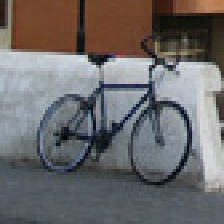

In [33]:
org_image

In [34]:
image = img_to_array(org_image)

In [36]:
image = preprocess_input(image)

In [37]:
image = image.reshape(1,224,224,3)

In [26]:
pred = vggmodel.predict(image)

In [27]:
decode_predictions(pred)

[[('n03792782', 'mountain_bike', 0.27120727),
  ('n04482393', 'tricycle', 0.1701205),
  ('n04509417', 'unicycle', 0.1312082),
  ('n02835271', 'bicycle-built-for-two', 0.052063823),
  ('n03785016', 'moped', 0.037459075)]]

The VGG-16 models predictions can be seen above. The input image was a bike leaning against a wall. All the VGG-16 predictions are related to bikes in some way, which seems reasonable. The top prediction is "mountain bike", it is hard to see exactly what type of bike the image displays, but it could very well be a mountain bike.

# PART 3: Using VGG-16 as a feature extractor 

In [28]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [29]:
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [38]:
os.chdir('/Users/calvinsmith/Documents/GitHub/DIT867/PA5/a5_images')

# Function that given a directory and a filename generates features using the vgg-16 model
# The function saves the features to the file filename in the directory dir.
def create_vgg16_features(dir,filename):
    
    generator = vgg_data_gen.flow_from_directory(
        os.getcwd() + dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)
    
    cnn_features = feature_extractor.predict(generator)
    
    with open (filename,'wb') as f:
        np.save(f,cnn_features)


    

In [33]:
os.getcwd()

'/Users/calvinsmith/Documents/GitHub/DIT867/PA5/a5_images'

In [39]:
# creating training features and saving to vgg_train.txt
create_vgg16_features('/train','vgg_train.txt')

Found 1600 images belonging to 2 classes.


In [40]:
# creating validation features and saving to vgg_val.txt
create_vgg16_features('/validation','vgg_val.txt')

Found 576 images belonging to 2 classes.


In [48]:
# new CNN
# Pretty simple with a flatten input layer + two dense layer with relu and sigmoid activation.
transfer_model = Sequential()
transfer_model.add(Flatten(input_shape = (2,2,512) ))
transfer_model.add(Dense(128,activation = 'relu'))
transfer_model.add(Dense(1,activation = 'sigmoid'))

transfer_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

In [56]:
# Function that loads the training and valdiation data and trains the new cnn classifier
def train_on_cnnfeatures():
    
    batch_size = 32
    
    with open('vgg_train.txt','rb') as f:
        train = np.load(f)
    
    with open('vgg_val.txt','rb') as f:
        test = np.load(f)
        
    train_labels = get_labels(len(train))
    test_labels = get_labels(len(test))
    
    model_fit = transfer_model.fit(train,train_labels, 
                       batch_size = batch_size,
                       epochs = 20,
                       verbose = 1,
                       validation_data = (test,test_labels))
    return model_fit

In [57]:
transfer_model = train_on_cnnfeatures()

Train on 1600 samples, validate on 576 samples
Epoch 1/20
1600/1600 [==============================] - 2s 1ms/sample - loss: 2.0201 - accuracy: 0.8594 - val_loss: 1.6457 - val_accuracy: 0.8524
Epoch 2/20
1600/1600 [==============================] - 1s 361us/sample - loss: 0.2466 - accuracy: 0.9569 - val_loss: 0.9142 - val_accuracy: 0.8802
Epoch 3/20
1600/1600 [==============================] - 1s 367us/sample - loss: 0.0288 - accuracy: 0.9919 - val_loss: 0.8086 - val_accuracy: 0.8854
Epoch 4/20
1600/1600 [==============================] - 1s 462us/sample - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.9096 - val_accuracy: 0.8785
Epoch 5/20
1600/1600 [==============================] - 1s 419us/sample - loss: 4.8163e-04 - accuracy: 1.0000 - val_loss: 0.8965 - val_accuracy: 0.8802
Epoch 6/20
1600/1600 [==============================] - 1s 353us/sample - loss: 2.2412e-04 - accuracy: 1.0000 - val_loss: 0.8951 - val_accuracy: 0.8819
Epoch 7/20
1600/1600 [==============================] - 1s 

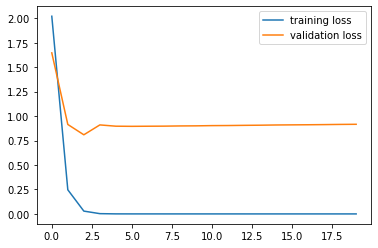

In [61]:
# Plotting training and validation loss
plt.plot(transfer_model.history['loss']);
plt.plot(transfer_model.history['val_loss']);
plt.legend(['training loss', 'validation loss']);

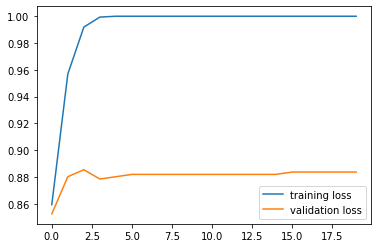

In [62]:
# Plotting training and validation loss
plt.plot(transfer_model.history['accuracy']);
plt.plot(transfer_model.history['val_accuracy']);
plt.legend(['training loss', 'validation loss']);

# Part 4: Visualizing the learned features

In [63]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [64]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

In [71]:
pos_img = kernel_image(first_layer_weights,1,True)

In [77]:
def visualize_feature(filter):
    pos_img = kernel_image(first_layer_weights,filter,True)
    neg_img = kernel_image(first_layer_weights,filter,False)
    
    plt.subplot(1,2,1)
    plt.imshow(pos_img)
    plt.title('Positive part')
    
    plt.subplot(1,2,2)
    plt.imshow(neg_img)
    plt.title('Negative part')
    
    plt.tight_layout()
    

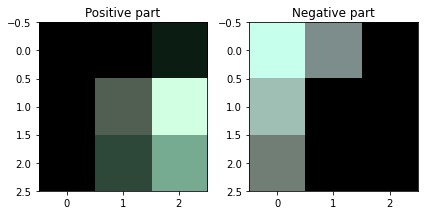

In [84]:
visualize_feature(60)